In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [1]:
Lx = 10         # Largo del dominio en x
Ly = 10         # Largo del dominio en y
dx = 0.05       # Tamaño de paso en x
dy = 0.05       # Tamaño de paso en y
Nx = int(Lx/dx) # Número de puntos en x
Ny = int(Ly/dy) # Número de puntos en y 
Nel = Nx*Ny     # Número de elementos


T = 5           # Tiempo total de simulación
dt = 0.01       # Tamaño de paso en el tiempo
Nt = int(T/dt)  # Número de pasos en el tiempo


Cx2 = 0.5**2    # Constante de Courant en x
Cy2 = 0.5**2    # Constante de Courant en y
c = 0.1         # Velocidad de propagación de la onda


In [4]:
x0 = np.linspace(0, Lx, Nx)         # Vector de posiciones en x
y0 = np.linspace(0, Ly, Ny)         # Vector de posiciones en y 

xmesh, ymesh = np.meshgrid(x0, y0)  # Malla de posiciones

In [5]:
u = np.zeros((Nx, Ny, Nt))          # Matriz de solución

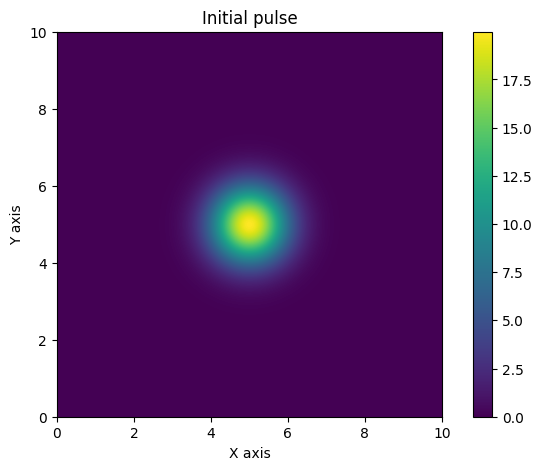

In [6]:
ini_g = lambda x, mu, sig: ((x - mu)/2*sig)**2

A = 20      # Amplitud de la onda
xo = 5      # centro de la onda en x
sigx = 2    # ancho de la onda en x 
yo = 5      # centro de la onda en y
sigy = 2    # ancho de la onda en y 

uo = A*np.exp(-(ini_g(xmesh, xo, sigx) + ini_g(ymesh, yo, sigy)))

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

im = ax.imshow(uo, vmin=abs(uo).min(), vmax=abs(uo).max(), \
               extent = [0, Lx, 0, Ly], interpolation='bilinear')
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("Initial pulse")

plt.colorbar(im)
plt.show()


In [15]:
import time
u[:,:,0] = uo

for y in range(1,Ny-1):
        for x in range(1,Nx-1):
            DxDx = Cx2*(u[x+1,y,0] - 2*u[x,y,0] + u[x-1,y,0])
            DyDy = Cy2*(u[x,y+1,0] - 2*u[x,y,0] + u[x,y-1,0])
            
            u[x,y,1] = u[x,y,0] + 0.5*(DxDx + DyDy)
t = 0
start = time.time()
for t in range(1, Nt-1):
    for y in range(1,Ny-1):
        for x in range(1,Nx-1):
            
            DxDx = Cx2*(u[x+1,y,t] - 2*u[x,y,t] + u[x-1,y,t])
            DyDy = Cy2*(u[x,y+1,t] - 2*u[x,y,t] + u[x,y-1,t])
            
            u[x,y,t+1] = 2*u[x,y,t] - u[x,y,t-1] + (DxDx + DyDy)
    
    u[0,:,t+1] = 0
    u[Lx,:,t+1] = 0
    u[:,0,t+1] = 0
    u[:,Ly,t+1] = 0

end = time.time()

MovieWriter imagemagick unavailable; using Pillow instead.


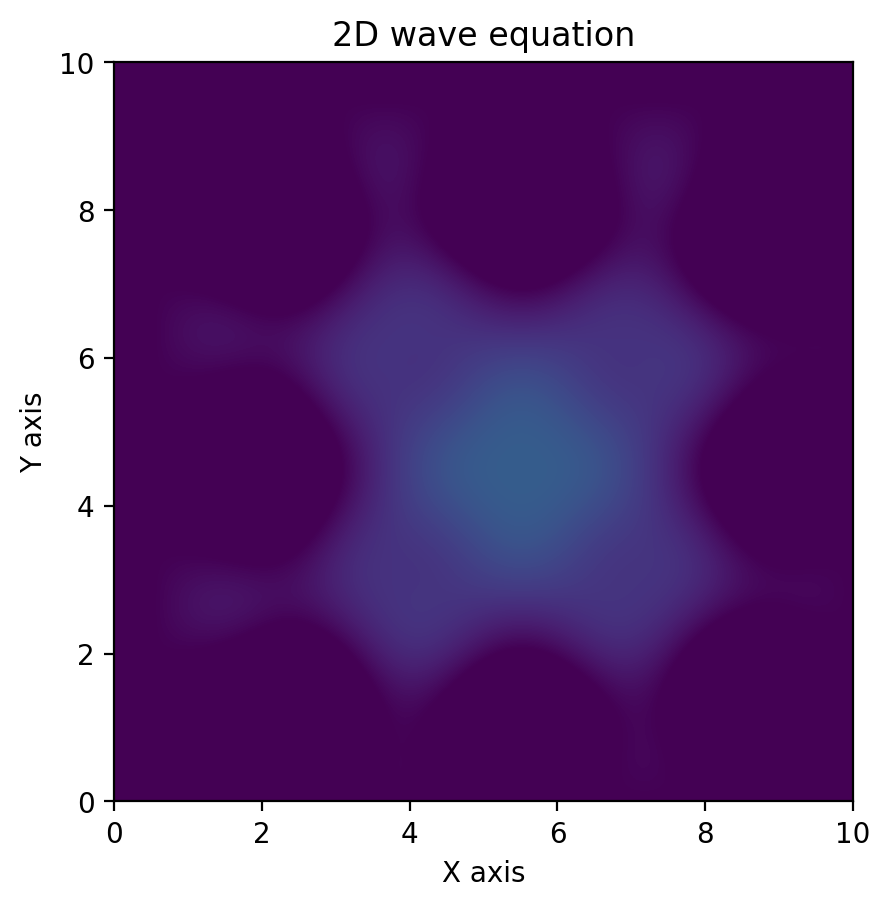

In [9]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("2D wave equation")

im = ax.imshow(uo, vmin=abs(uo).min(), vmax=abs(uo).max(), \
               extent = [0, Lx, 0, Ly], interpolation='bilinear')

def init():
    return [im]

def animate(i):
    a = im.get_array()
    a = u[:,:,i]
    im.set_array(a)
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=Nt, interval=10, blit=True)

anim.save('wave_equation_2D.gif', writer='imagemagick', fps=30)

